# Iris flower classification

In [22]:
# importing libraries 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#for models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [10]:
# loading our dataset

data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
x = data.iloc[:,:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y = data.iloc[:,-1]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

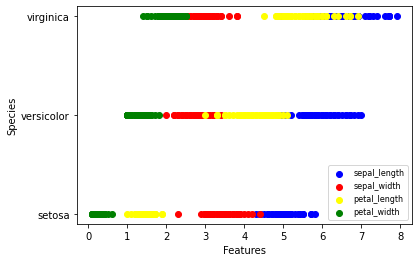

In [13]:
# plotting relationships of features with targert(species)

plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'blue', label = 'sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'red', label = 'sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'yellow', label = 'petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color = 'green', label = 'petal_width')

plt.legend(loc = 4, prop={'size':8})
plt.show()

### Train Test Split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

### Logistic Regression

In [18]:
LogRegModel = LogisticRegression().fit(xtrain, ytrain)
LogRegModel.score(xtest, ytest)

0.9666666666666667

In [19]:
LogRegModel.predict([[5.0, 3.6, 1.4, 0.2]])

array(['setosa'], dtype=object)

### SVM

In [30]:
SvmModel = SVC()
SvmModel.fit(xtrain, ytrain)
SvmModel.score(xtest, ytest)

1.0

### Random Forest

In [25]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9666666666666667

# Confusion Metrics

Text(0.5, 1.0, 'Confusion Matrix')

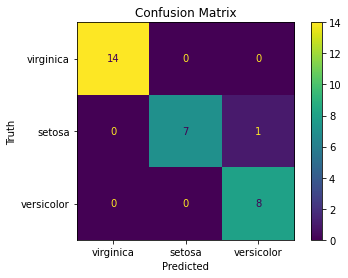

In [29]:
# We are now going to draw confusion metrics to visulize how many times our model has has classified correctly
# As accuracy of SVM is 100% so we will use some other model so that it can also plot the failed attempts

yPredicted = LogRegModel.predict(xtest)

cm = confusion_matrix(ytest, yPredicted)
labels = ['virginica', 'setosa', 'versicolor']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')